In [3]:
import torch
from torch import nn
from torchvision import models,transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.804, 0.821, 0.776], [0.298, 0.272, 0.337])
])

model_ft = models.densenet121(pretrained=True)
model_ft.classifier = nn.Linear(1024, 300)
model_ft.load_state_dict(torch.load('../params_densenet12103.pkl', map_location=lambda storage, loc: storage))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [4]:
print(model_ft)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [6]:
pic = Image.open('../data/img1.jpeg')

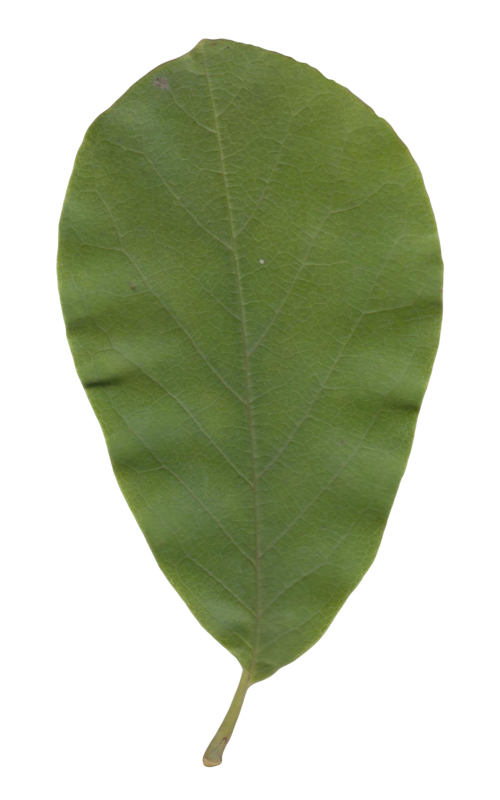

In [24]:
pic

In [11]:
pic_trans = transform(pic).unsqueeze_(0)

In [12]:
pic_trans.size()

torch.Size([1, 3, 224, 224])

In [28]:
def get_feature(pic, select_layer):
    x = pic
    for index,layer in enumerate(model_ft.features):
        x = layer(x)
        if index == select_layer:
            break
    return x

In [66]:
def get_all_features(pic):
    l = []
    for i in range(10):
        f = get_feature(pic, i)
        n = f.size(1)
        for index in range(n):
            feature=f[:,index,:,:]
            feature=feature.view(feature.shape[1],feature.shape[2])
            feature=feature.data.numpy()
            feature= 1.0/(1+np.exp(-1*feature))
            feature=np.round(feature*255)
            l.append(feature)
    return l

In [67]:
ff = get_all_features(pic_trans)

In [69]:
for i, img in enumerate(ff):
    plt.imsave(f'../raw/{i}_featureMap.jpg', img)

In [70]:
for i, img in enumerate(ff):
    plt.imsave(f'../gray/{i}_featureMap_gray.jpg', img,cmap='gray')

In [50]:
f = get_feature(pic_trans, 3)

In [51]:
feature=f[:,2,:,:]
feature=feature.view(feature.shape[1],feature.shape[2])

In [52]:
feature.size()

torch.Size([56, 56])

In [53]:
feature=feature.data.numpy()
feature= 1.0/(1+np.exp(-1*feature))
feature=np.round(feature*255)

In [54]:
feature

array([[130., 129., 129., ..., 129., 129., 129.],
       [130., 129., 129., ..., 129., 129., 129.],
       [130., 129., 129., ..., 129., 129., 129.],
       ...,
       [130., 129., 129., ..., 129., 129., 129.],
       [130., 129., 129., ..., 129., 129., 129.],
       [130., 129., 129., ..., 129., 129., 129.]], dtype=float32)

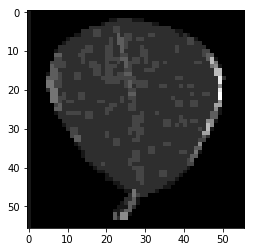

In [57]:
plt.imshow(feature,cmap='gray')